In [1]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread
import numpy as np
from operator import itemgetter
from csv import writer

In [75]:
#Loads data
img = imread('image.png')
df = pd.read_csv('data/local_data.csv', sep=',', header=None)

y = df[0]
label = df[1]
x = df.drop([0, 1, 2], axis=1)

In [76]:
#Converts image to array of numbers
def image_convert(img):
    lat = []
    grey = img[:,:,1]
    
    lat = 0
    lat_array = []
    for col in grey.T:
        lat = len(grey)
        temp_arr = []
        for i in col:
            lat -= 1
            if i == 0:
                temp_arr.append(lat)
        if temp_arr:
            num = sum(temp_arr) / len(temp_arr)
            lat_array.append(num)
    return lat_array

In [77]:
#Fits LC into 200 dataa points (local view)
def data_fit(data, fit=200):
    div = len(data) / fit
    result = pd.Series(data)
    smoothed = result.groupby(result.index // div).mean()
    normalized = (smoothed-min(smoothed))/(max(smoothed)-min(smoothed))
    
    plt.figure(figsize=(10,5))
    plt.plot(normalized)
    plt.show()
    return normalized

In [78]:
#Calculates euclidean distance
def euclidean_distance(target):
    target = np.array(target)
    dist = []
    for i, row in x.iterrows():
        a = target
        b = row
        dist.append(np.linalg.norm(a-b))
    return dist

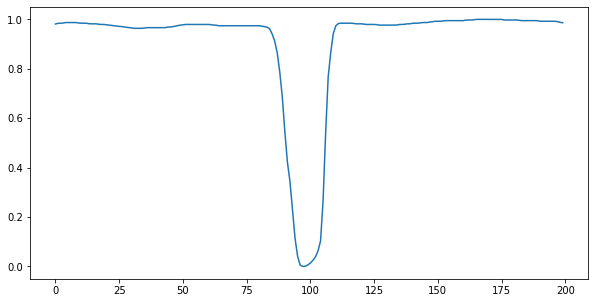

In [79]:
#Gets best LC from euclidean distance
data = image_convert(img)
final = data_fit(data)

#outputs input LC 
with open('test_data.csv', 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(final)